In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

In [34]:
crypten_data = pd.read_csv('crypten_experiments/datasize_nn.csv', skiprows=(lambda x: (x % 2 != 0)))
crypten_data = crypten_data.drop(index=range(14))

print(crypten_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
14      326.754222      0          64       7500    0.1110     123.076313
15      324.844453      1          64       7500    0.1420     120.906320
16      325.117119      2          64       7500    0.1827     123.195792
17      329.731910      0          64       7500    0.4314     122.990935
18      331.517049      1          64       7500    0.4393     124.898937
19      328.722831      2          64       7500    0.4463     123.569881
20      660.024929      0          64      15000    0.2029     122.754379
21      663.470128      1          64      15000    0.2546     121.724306
22      656.050495      2          64      15000    0.3385     123.370837
23      646.027991      0          64      15000    0.3665     120.036589
24      646.170944      1          64      15000    0.4018     118.788347
25      644.250591      2          64      15000    0.4160     119.101177
26     1315.274356      0          64 

In [35]:
torch_data = pd.read_csv('torch/datasize_nn.csv')

print(torch_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0         1.038539      0          64       7500    0.1422       1.025266
1         1.093077      1          64       7500    0.2080       0.974051
2         1.153512      2          64       7500    0.2597       0.961352
3         2.146109      0          64      15000    0.3865       0.958159
4         2.078753      1          64      15000    0.4384       0.935877
5         2.148911      2          64      15000    0.4645       0.966783
6         4.439492      0          64      30000    0.5719       0.990401
7         4.617818      1          64      30000    0.6190       0.902245
8         4.489928      2          64      30000    0.6348       0.932495
9         8.775790      0          64      60000    0.6456       0.899242
10        8.883341      1          64      60000    0.6556       0.922266
11        8.851315      2          64      60000    0.6624       0.902510
12       11.403549      0          32 

In [36]:
mean_crypten = crypten_data.groupby('data_size')['epoch_duration'].mean()
print(mean_crypten)
mean_torch = torch_data.groupby('data_size')['epoch_duration'].mean()
print(mean_torch)

data_size
7500      327.781264
15000     652.665846
30000    1309.449745
60000    2592.597202
Name: epoch_duration, dtype: float64
data_size
7500     1.095043
15000    2.124591
30000    4.515746
60000    9.478499
Name: epoch_duration, dtype: float64


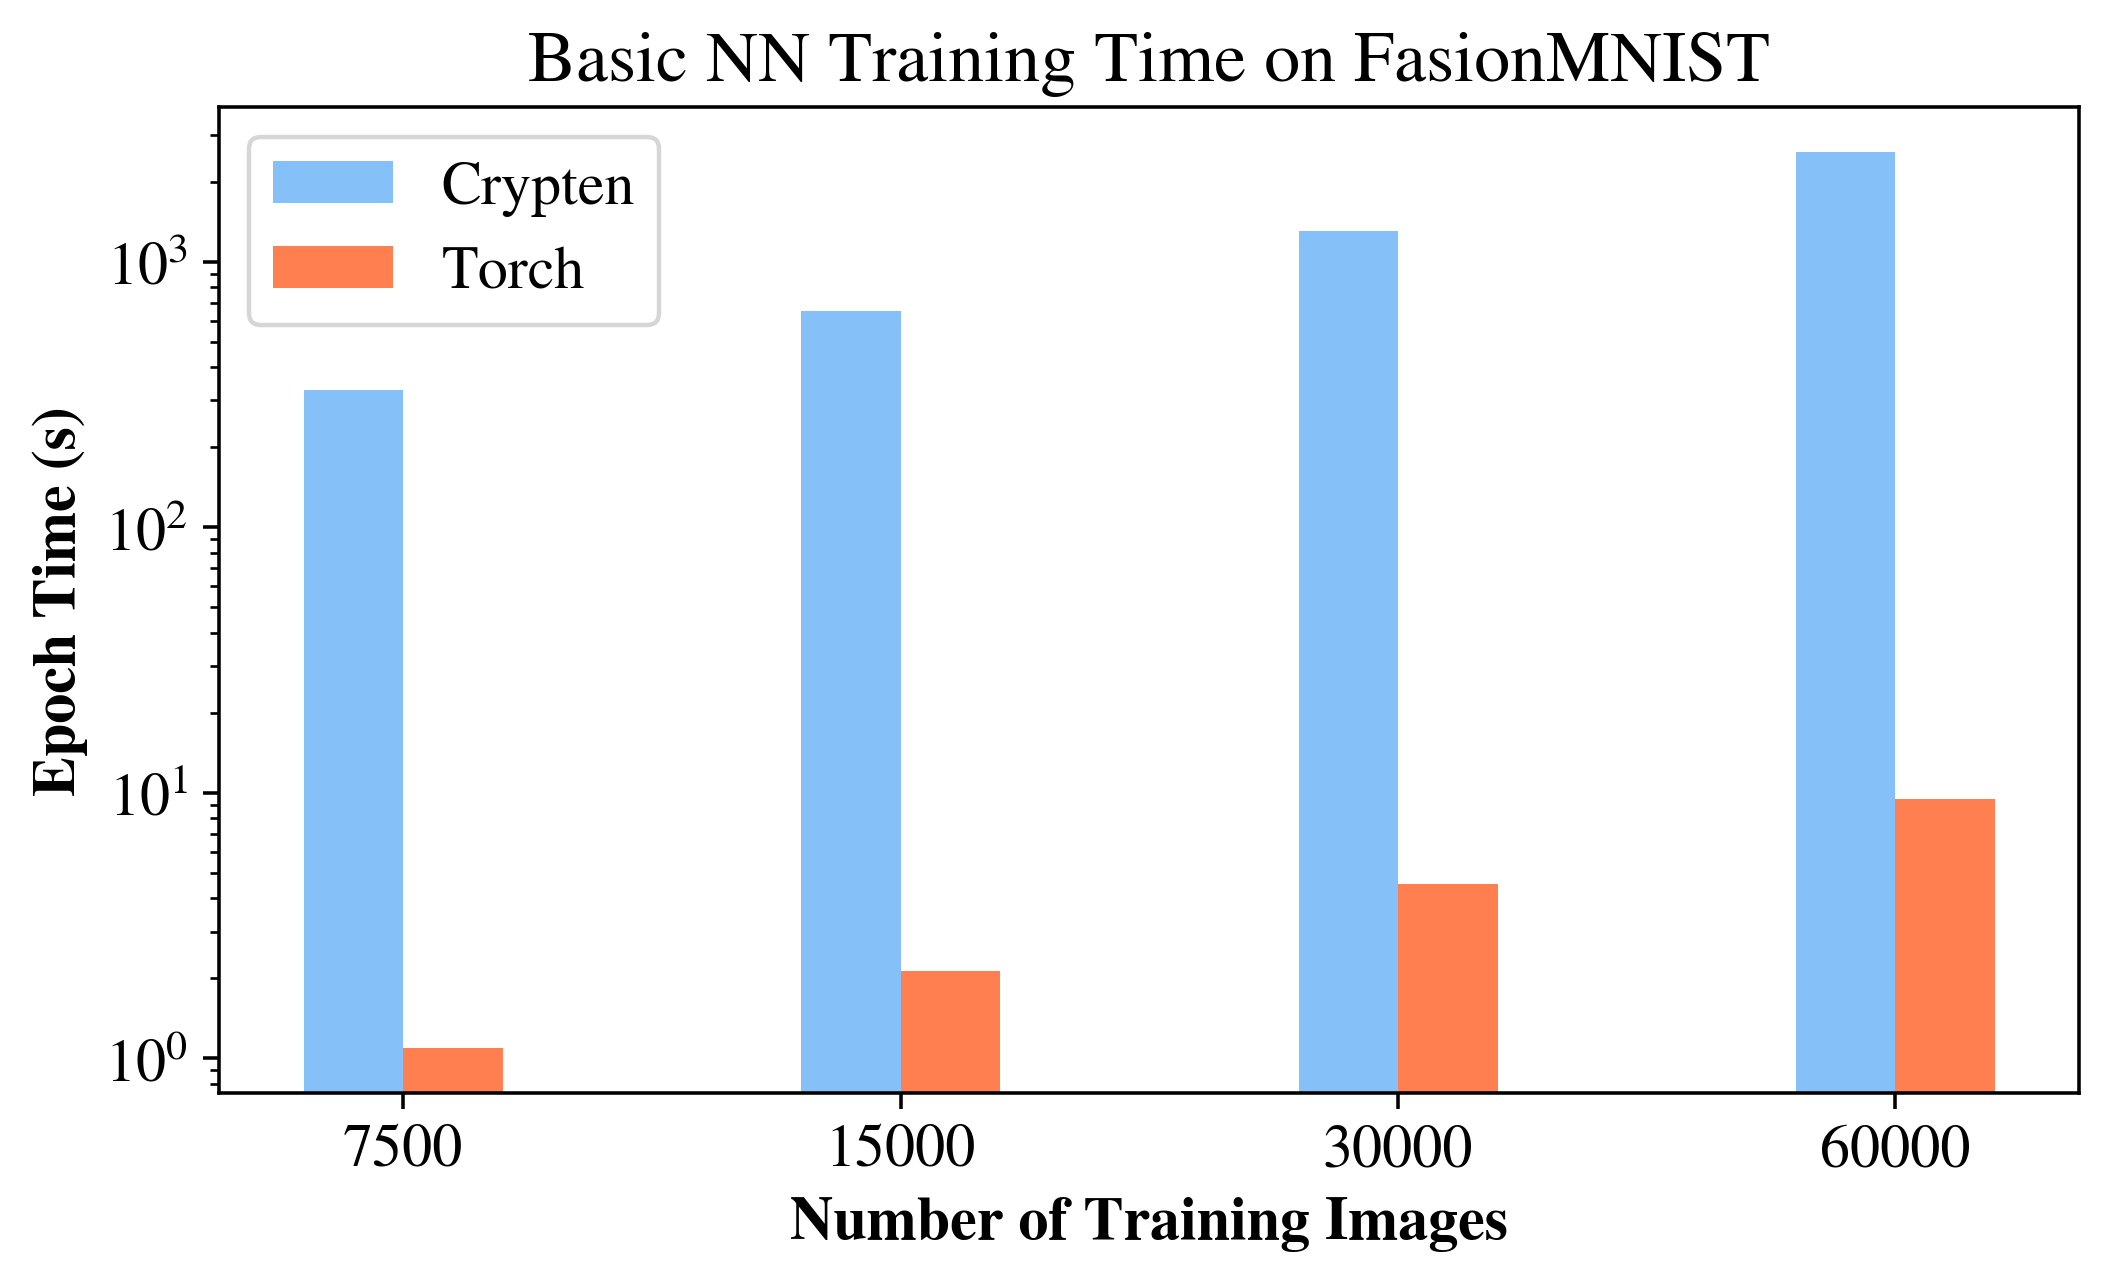

In [37]:
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2, width=width, height = mean_crypten, label = "Crypten", color='#85C0F9')
plt.bar(x=X_axis+width/2, width=width, height = mean_torch, label = "Torch", color='coral')

plt.yscale('log')

plt.xlabel("Number of Training Images", fontweight="bold")
plt.ylabel("Epoch Time (s)", fontweight="bold")
plt.title("Basic NN Training Time on FasionMNIST")
plt.legend()

plt.xticks(X_axis, ["7500", "15000", "30000", "60000"])

plt.savefig("nn_datasize.pdf", bbox_inches='tight')

plt.show()

In [38]:
crypten_data = pd.read_csv('crypten_experiments/minibatch_nn.csv', skiprows=(lambda x: (x % 2 != 0)))

print(crypten_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0      4041.654783      0          32      60000    0.5472     123.381161
1      4058.941986      1          32      60000    0.6255     123.120027
2      4049.698871      2          32      60000    0.6551     123.022374
3      4078.487997      0          32      60000    0.4592     122.717913
4      4064.787294      1          32      60000    0.4779     123.563938
5      4090.128068      2          32      60000    0.4808     123.906313
6      2587.367847      0          64      60000    0.3092     122.436010
7      2569.206346      1          64      60000    0.5011     122.545869
8      2577.800215      2          64      60000    0.5715     121.417933
9      2588.822173      0          64      60000    0.0989     122.002135
10     2578.522054      1          64      60000    0.0997     122.273886
11     2579.185670      2          64      60000    0.0954     121.912998
12     1828.772482      0         128 

In [39]:
torch_data = pd.read_csv('torch/minibatch_nn.csv')

print(torch_data)

    epoch_duration  epoch  batch_size  data_size  accuracy  test_duration
0        11.568936      0          32      60000    0.5408       1.001559
1        12.487438      1          32      60000    0.6326       0.891661
2        12.977742      2          32      60000    0.6579       0.891449
3         9.776157      0          64      60000    0.6733       0.900894
4        10.303210      1          64      60000    0.6842       1.055882
5        11.459164      2          64      60000    0.6972       0.930882
6         8.179447      0         128      60000    0.7032       0.919338
7         9.288245      1         128      60000    0.7108       0.924267
8         8.903856      2         128      60000    0.7168       0.996671
9         7.397617      0         256      60000    0.7194       0.913545
10        7.250790      1         256      60000    0.7227       1.054831
11        7.416602      2         256      60000    0.7265       0.937437


In [40]:
mean_crypten = crypten_data.groupby('batch_size')['epoch_duration'].mean()
print(mean_crypten)
mean_torch = torch_data.groupby('batch_size')['epoch_duration'].mean()
print(mean_torch)

batch_size
32     4063.949833
64     2580.150718
128    1817.651012
256    1426.627786
Name: epoch_duration, dtype: float64
batch_size
32     12.344706
64     10.512844
128     8.790516
256     7.355003
Name: epoch_duration, dtype: float64


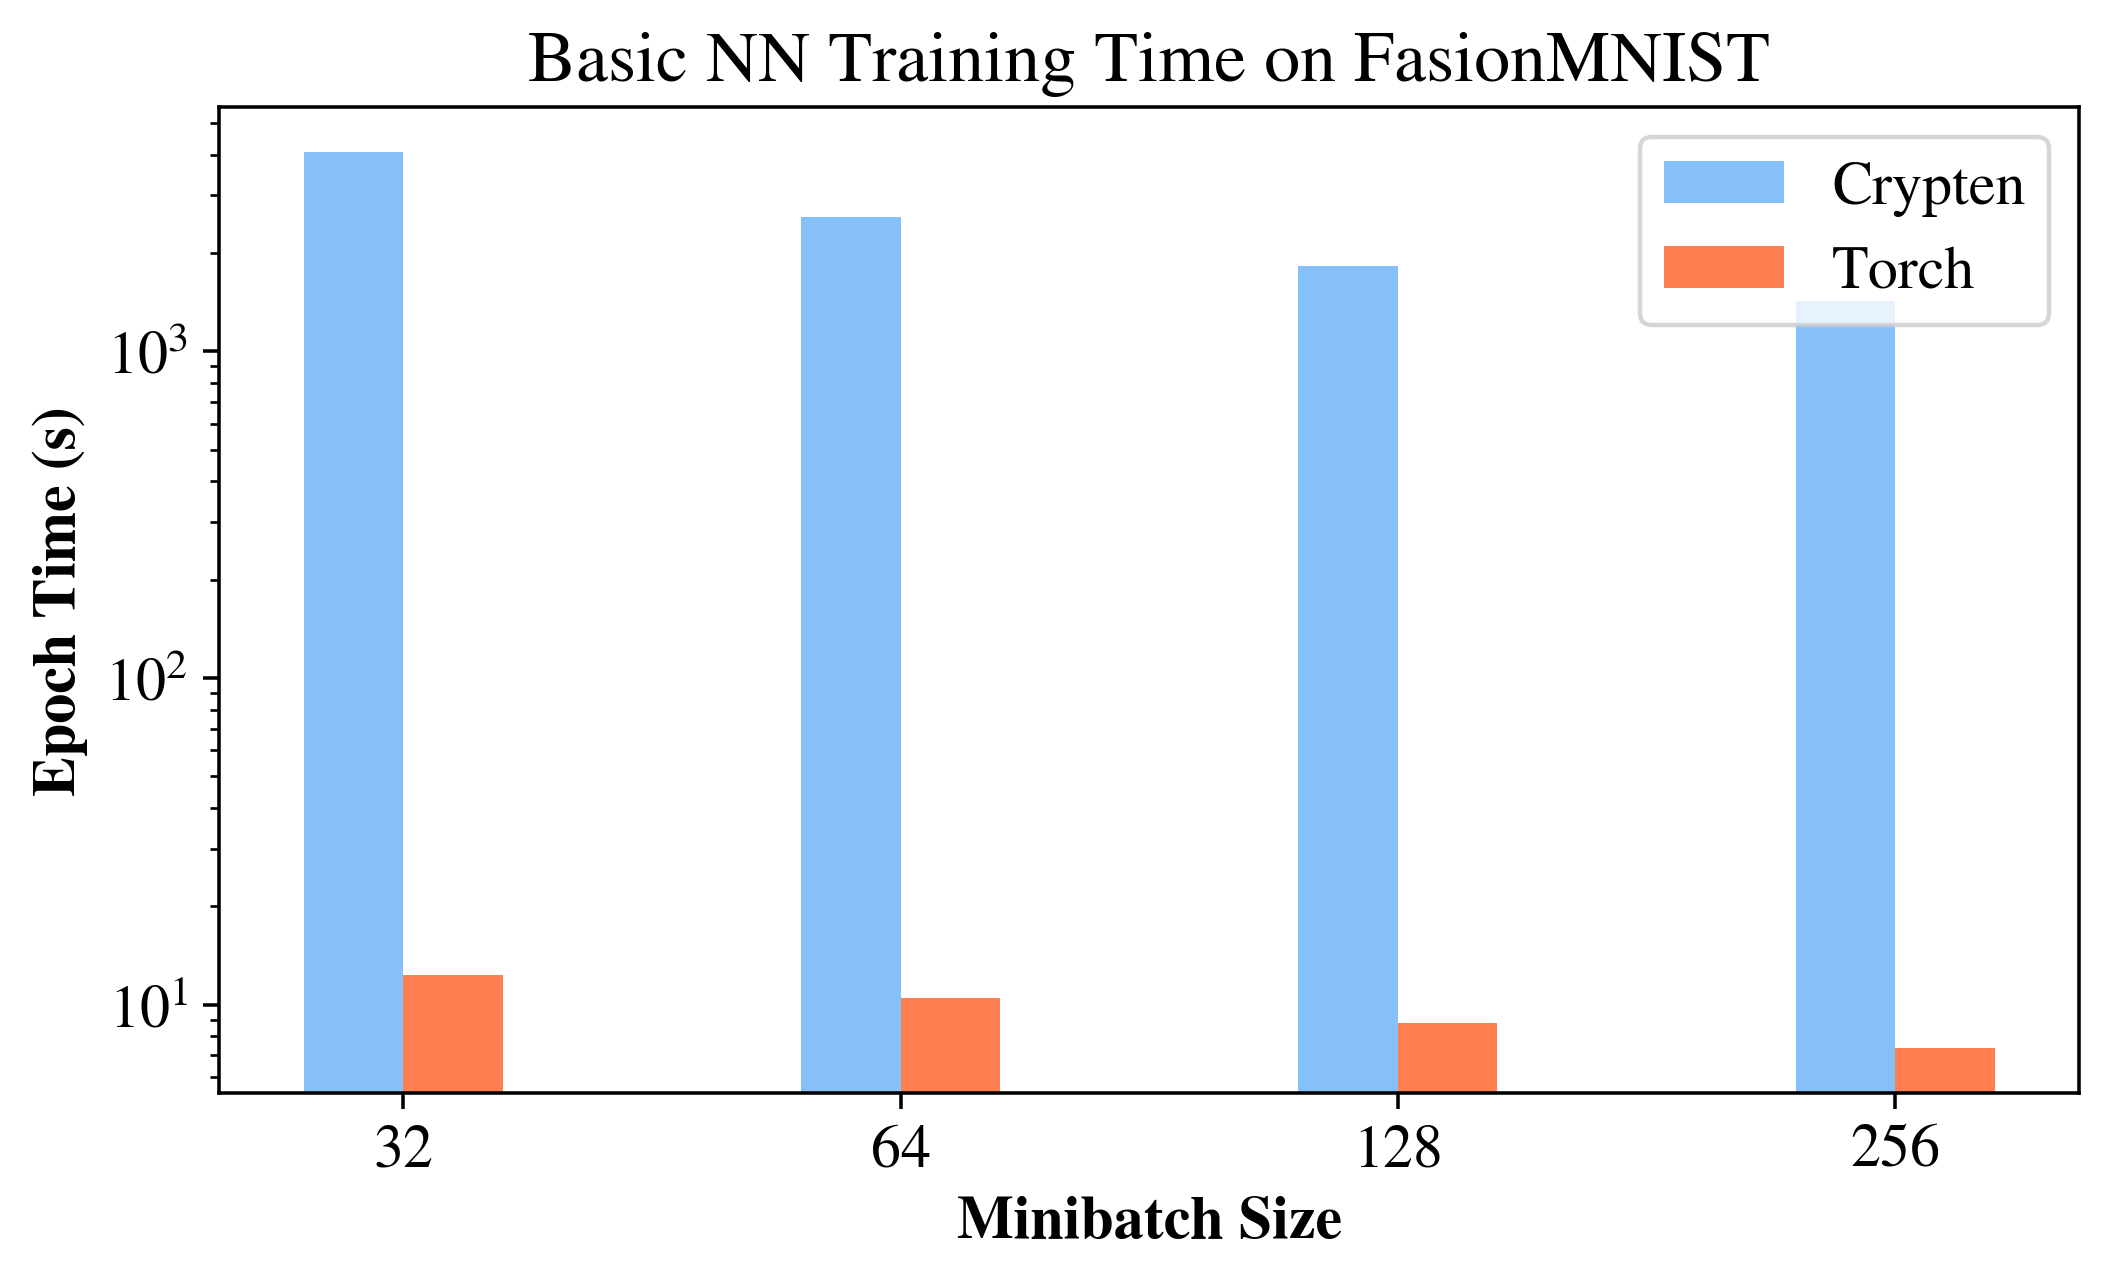

In [41]:
X_axis = np.arange(4)+1
width = 0.2

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2, width=width, height = mean_crypten, label = "Crypten", color='#85C0F9')
plt.bar(x=X_axis+width/2, width=width, height = mean_torch, label = "Torch", color='coral')

plt.yscale('log')

plt.xlabel("Minibatch Size", fontweight="bold")
plt.ylabel("Epoch Time (s)", fontweight="bold")
plt.title("Basic NN Training Time on FasionMNIST")
plt.legend()

plt.xticks(X_axis, ["32", "64", "128", "256"])

plt.savefig("nn_minibatch.pdf", bbox_inches='tight')

plt.show()